In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train=pd.read_csv('D:/R/data/train.csv')
test=pd.read_csv('D:/R/data/testA.csv')

In [3]:
train.shape

(800000, 47)

In [4]:
test.shape

(200000, 46)

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [6]:
print(train.describe())

                  id       loanAmnt           term   interestRate  \
count  800000.000000  800000.000000  800000.000000  800000.000000   
mean   399999.500000   14416.818875       3.482745      13.238391   
std    230940.252015    8716.086178       0.855832       4.765757   
min         0.000000     500.000000       3.000000       5.310000   
25%    199999.750000    8000.000000       3.000000       9.750000   
50%    399999.500000   12000.000000       3.000000      12.740000   
75%    599999.250000   20000.000000       3.000000      15.990000   
max    799999.000000   40000.000000       5.000000      30.990000   

         installment  employmentTitle  homeOwnership  annualIncome  \
count  800000.000000    799999.000000  800000.000000  8.000000e+05   
mean      437.947723     72005.351714       0.614213  7.613391e+04   
std       261.460393    106585.640204       0.675749  6.894751e+04   
min        15.690000         0.000000       0.000000  0.000000e+00   
25%       248.450000       4

In [7]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

In [8]:
print(test.describe())

                  id       loanAmnt           term   interestRate  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean   899999.500000   14436.954125       3.481690      13.244800   
std     57735.171256    8737.430326       0.855195       4.766528   
min    800000.000000     500.000000       3.000000       5.310000   
25%    849999.750000    8000.000000       3.000000       9.750000   
50%    899999.500000   12000.000000       3.000000      12.740000   
75%    949999.250000   20000.000000       3.000000      15.990000   
max    999999.000000   40000.000000       5.000000      30.990000   

         installment  employmentTitle  homeOwnership  annualIncome  \
count  200000.000000    200000.000000  200000.000000  2.000000e+05   
mean      438.737804     72435.750740       0.614100  7.645184e+04   
std       262.246698    106892.374933       0.675465  7.766237e+04   
min        14.010000         0.000000       0.000000  0.000000e+00   
25%       248.890000       4

In [9]:
#check duplicate
train.duplicated().sum()

0

In [10]:
#check missing value
train.isnull().any().sum() 

22

<AxesSubplot:>

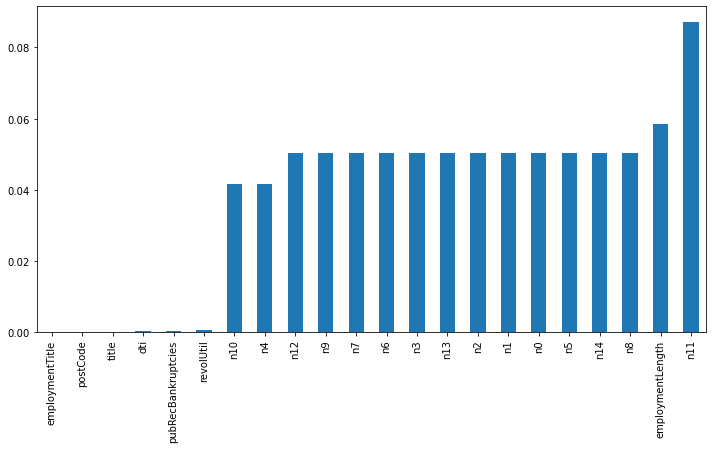

In [11]:
#check missing value proportion
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot(kind = "bar", figsize = (12, 6))

In [12]:
#check feature type of training set
numerical_fea = list(train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(train.columns)))
print(numerical_fea)
print('------'*20)
print(category_fea)

['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
------------------------------------------------------------------------------------------------------------------------
['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


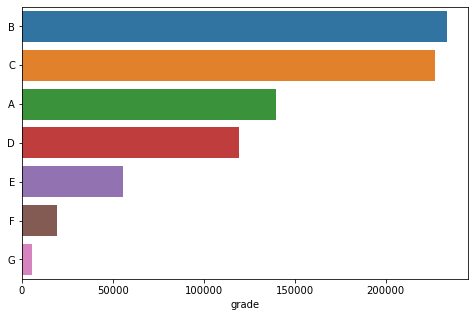

In [13]:
#distribution of categorical variable "grade"
plt.figure(figsize=(8, 5))
sns.barplot(train["grade"].value_counts()[:15],
            train["grade"].value_counts().keys()[:15])
plt.show()

In [14]:
# Determine whether a numerical variable is a single-valued variable, a discrete variable, or a continuous variable
def get_numerical_fea(data, feas):
    numerical_serial_fea = []
    numerical_discrete_fea = []
    numerical_unique_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp ==1:
            numerical_unique_fea.append(fea)
        elif temp <= 15:
            numerical_discrete_fea.append(fea)
        else:
            numerical_serial_fea.append(fea)
    return numerical_unique_fea,numerical_discrete_fea,numerical_serial_fea

# Numerical variable classification of training set
numerical_unique_fea,numerical_discrete_fea,numerical_serial_fea = get_numerical_fea(train,numerical_fea)
print(numerical_unique_fea)
print('------'*20)
print(numerical_discrete_fea)
print('------'*20)
print(numerical_serial_fea)

['policyCode']
------------------------------------------------------------------------------------------------------------------------
['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'purpose', 'pubRecBankruptcies', 'initialListStatus', 'applicationType', 'n11', 'n12']
------------------------------------------------------------------------------------------------------------------------
['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']


In [15]:
#feature types of test set 
numerical_fea1 = list(test.select_dtypes(exclude=['object']).columns)
category_fea1 = list(filter(lambda x: x not in numerical_fea1,list(test.columns)))
print(numerical_fea1)
print('------'*20)
print(category_fea1)

numerical_unique_fea1,numerical_discrete_fea1,numerical_serial_fea1 = get_numerical_fea(test,numerical_fea1)
print('------'*20)
print(numerical_unique_fea1)
print('------'*20)
print(numerical_discrete_fea1)
print('------'*20)
print(numerical_serial_fea1)

['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
------------------------------------------------------------------------------------------------------------------------
['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
------------------------------------------------------------------------------------------------------------------------
['policyCode']
------------------------------------------------------------------------------------------------------------------------
['term', 'homeOwnership', 'verificationStatus', 'purpose', 'pubRecBankruptcie

In [16]:
#characteristics of the discrete variable term
print(train['term'].value_counts())

3    606902
5    193098
Name: term, dtype: int64


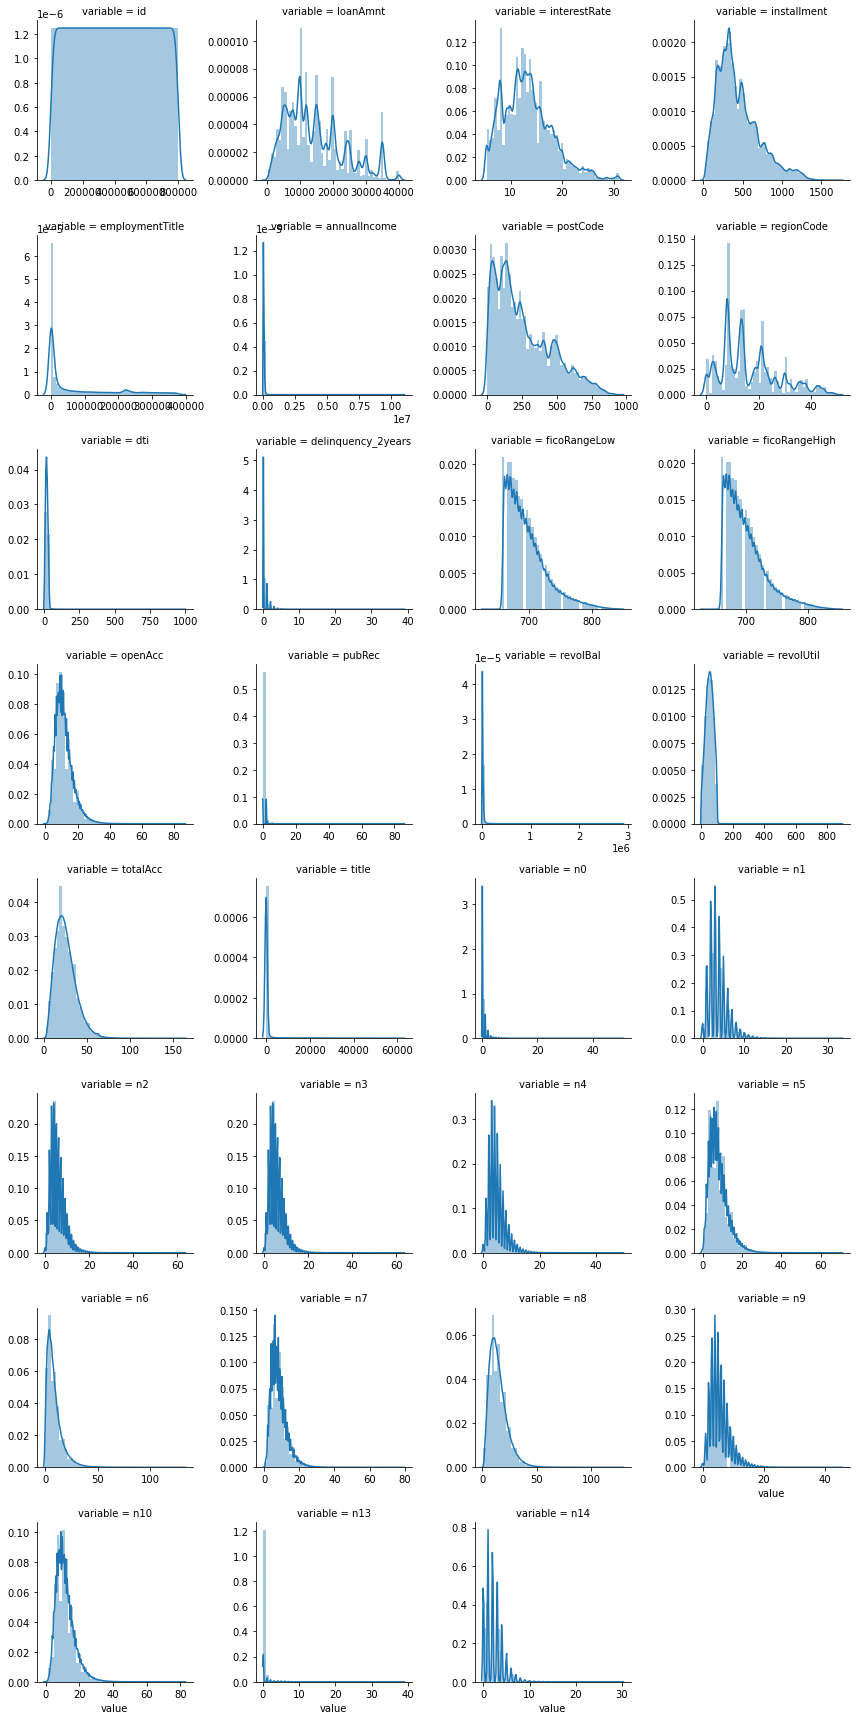

In [17]:
# distribution of continuous variable
f = pd.melt(train, value_vars = numerical_serial_fea)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Text(0.5, 0, 'loanAmnt')

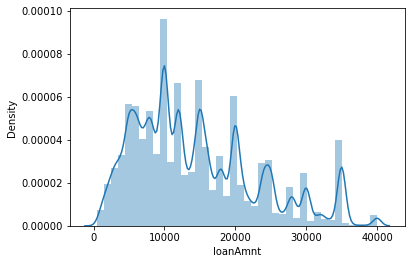

In [19]:
# distribution of loan amounts
sns.distplot(train.loanAmnt,bins=40)
plt.xlabel('loanAmnt')

Text(0, 0.5, 'Density')

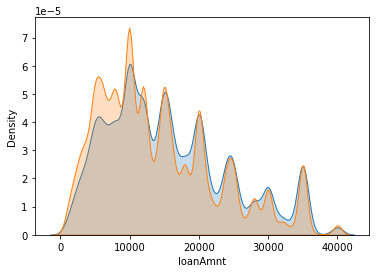

In [17]:
#density distribution of the continuous variable loanAmnt on different labels
sns.kdeplot(train.loanAmnt[train['isDefault'][train['isDefault']==1].index], label = '1', shade=True)#违约
sns.kdeplot(train.loanAmnt[train['isDefault'][train['isDefault']==0].index], label = '0', shade=True)#没有违约
plt.xlabel('loanAmnt')
plt.ylabel('Density')

<AxesSubplot:>

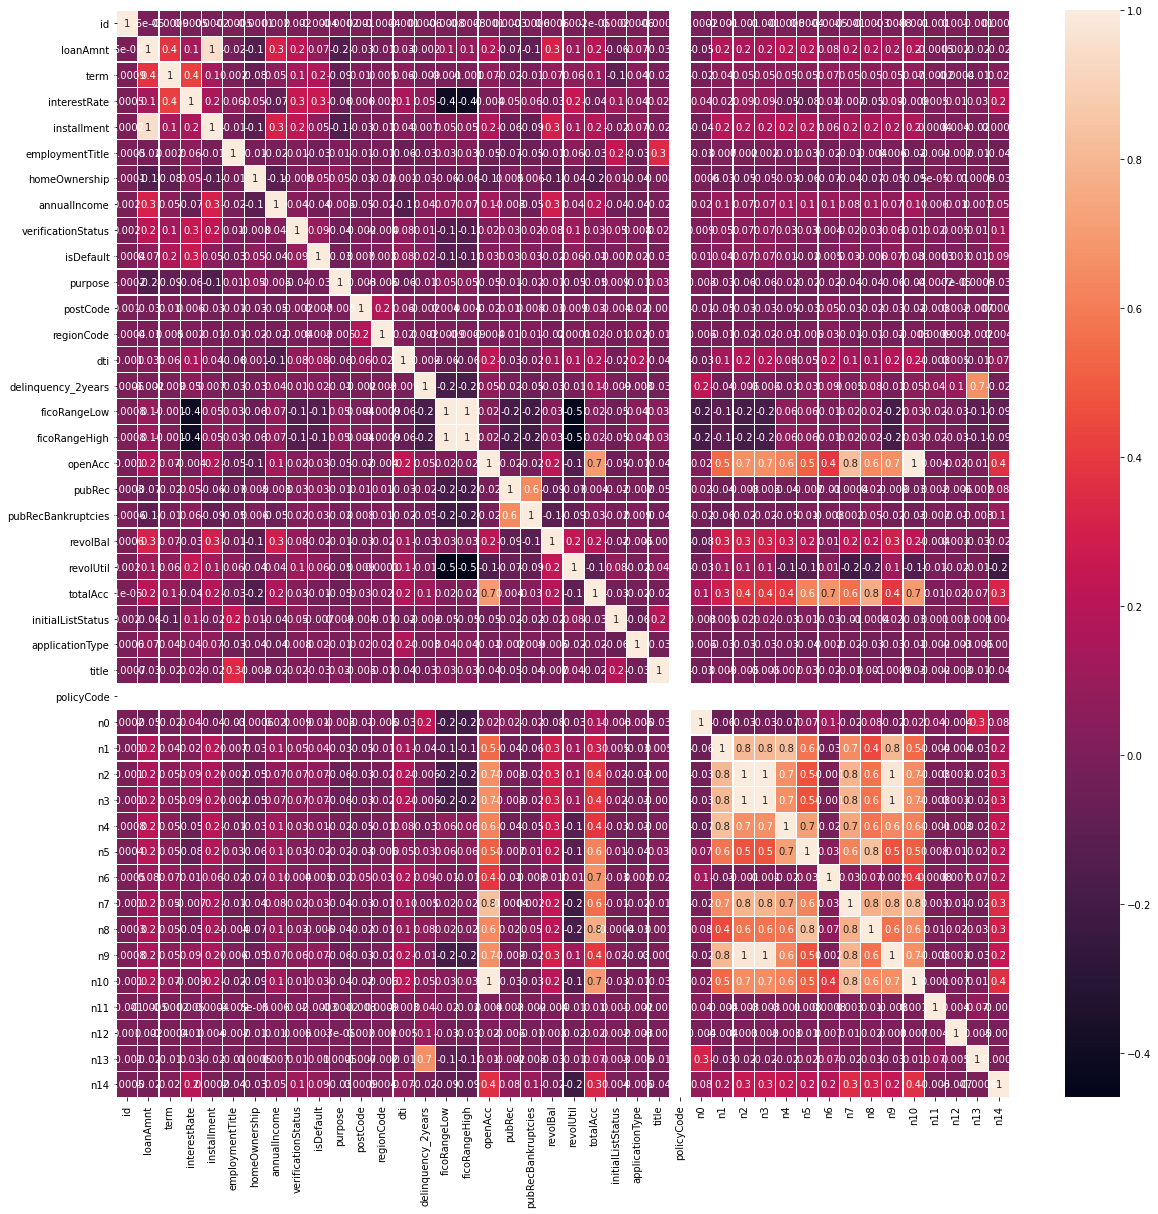

In [18]:
# heat map to observe the correlation relationship between variables
f, ax = plt.subplots(1,1, figsize = (20,20))
cor = train[numerical_fea].corr()
sns.heatmap(cor, annot = True, linewidth = 0.2, linecolor = "white", ax = ax, fmt =".1g" )

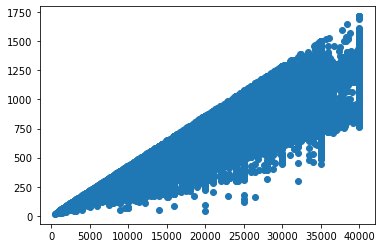

In [20]:
plt.scatter(train['loanAmnt'],train['installment'])

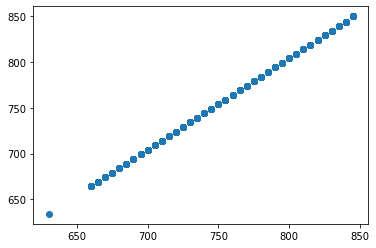

In [21]:
plt.scatter(train['ficoRangeLow'],train['ficoRangeHigh'])

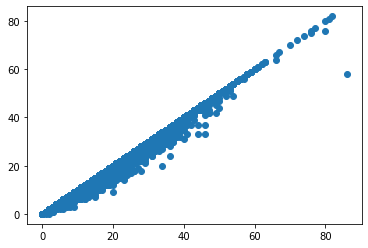

In [22]:
plt.scatter(train['openAcc'],train['n10'])

In [23]:
print(category_fea)

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


Text(0.5, 1.0, 'Distribution of issueDateDT dates')

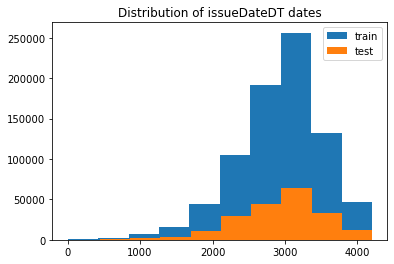

In [24]:
#IssueDate time format processing, converted to days
for df in [train,test]:
    df['issueDate'] = pd.to_datetime(df['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    df['issueDateDT'] = df['issueDate'].apply(lambda x: x-startdate).dt.days

plt.hist(train['issueDateDT'],label = "train")
plt.hist(test['issueDateDT'], label = "test")
plt.legend()
plt.title('Distribution of issueDateDT dates')

Text(0.5, 1.0, 'Distribution of earliesCreditLine dates')

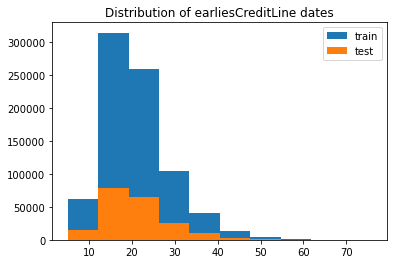

In [25]:
# Convert earlyCreditLine to the number of years until 2020
for df in [train,test]:
    df['earliesCreditLine'] = df['earliesCreditLine'].apply(lambda x: 2020-int(x[-4:]))
    
plt.hist(train['earliesCreditLine'],label = "train")
plt.hist(test['earliesCreditLine'],label = "test")
plt.legend()
plt.title('Distribution of earliesCreditLine dates')

In [26]:
train['employmentLength'].unique()

array(['2 years', '5 years', '8 years', '10+ years', nan, '7 years',
       '9 years', '1 year', '3 years', '< 1 year', '4 years', '6 years'],
      dtype=object)

In [27]:
#Limit year data for employmentLength to 0 to 10 years
for data in [train,test]:
    data['employmentLength'].replace('< 1 year','0 year',inplace = True)
    data['employmentLength'].replace('10+ years','10 years',inplace = True)
    data['employmentLength'] = data['employmentLength'].apply(lambda x:int(str(x).split()[0]) if pd.notnull(x) else x)   

In [28]:
train['employmentLength'].sample(5)

456267     6.0
683407     1.0
568825    10.0
310213     8.0
285607    10.0
Name: employmentLength, dtype: float64

In [29]:
for colname in ['grade','subGrade']:
    unique_num = train.append(test)[colname].nunique()
    unique_val = sorted(train.append(test)[colname].unique())
    for data in [train,test]:
        map_dict = {x:y for x,y in zip(unique_val,range(unique_num))}
        data[colname] = data[colname].map(map_dict)

In [34]:
train['grade'].sample(5)

337247    2
284523    1
441164    2
28489     3
189118    2
Name: grade, dtype: int64

In [35]:
train['subGrade'].sample(5)

442066     8
168359     6
409629     4
331969     8
601093    22
Name: subGrade, dtype: int64

In [30]:
# fill numeric features by mean
train[numerical_fea] = train[numerical_fea].fillna(train[numerical_fea].median()) 
test[numerical_fea1] = test[numerical_fea1].fillna(train[numerical_fea1].median()) 
# fill categorical features by mode
train[category_fea] = train[category_fea].fillna(train[category_fea].mode()) 
test[category_fea1] = test[category_fea1].fillna(train[category_fea1].mode())
# fill employmentLength by random forest
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
empLenNotNullInd = train.employmentLength.notnull()
columns = ['postCode','regionCode','employmentTitle','annualIncome']
DTC.fit(train.loc[empLenNotNullInd,columns], train.employmentLength[empLenNotNullInd])
print(DTC.score(train.loc[empLenNotNullInd,columns], train.employmentLength[empLenNotNullInd]))

for data in [train,test]:
    empLen_pred = DTC.predict(data.loc[:,columns])
    empLenIsNullInd = data.employmentLength.isnull()
    data.employmentLength[empLenIsNullInd] = empLen_pred[empLenIsNullInd]
train.isnull().sum()

0.9809320486828881


id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9              

In [31]:
# Use mean square error method to detect and remove outliers
def find_outliers(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off=3*data_std
    lower=data_mean-outliers_cut_off
    upper=data_mean+outliers_cut_off
    data[fea+'_outliers']=data[fea].apply(lambda x:str('outliers') if x>upper or x<lower else 'normal')
    return data

train = train.copy()
for fea in numerical_fea:
    train = find_outliers(train,fea)
    print(train[fea+'_outliers'].value_counts())
    print(train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)
for fea in numerical_fea:
    train = train[train[fea+'_outliers']=='normal']
    train = train.reset_index(drop=True) 

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    799701
异常值       299
Name: homeOwnership_outliers, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      

In [32]:
col = ['installment','ficoRangeHigh','policyCode']
for data in [train,test]:
    data.drop(col,axis=1,inplace=True)

In [33]:
train.to_csv('D:/R/data/train_clean.csv',index=False)
test.to_csv('D:/R/data/test_clean.csv',index=False)